In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import astropy.units as u
import lightkurve as lk
%matplotlib inline

# MPL defaults

In [2]:
mpl.rcParams["figure.figsize"] = (6, 4)
mpl.rcParams["figure.dpi"] = 200
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['xtick.direction'] = 'inout'
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

mpl.rcParams['font.size'] = SMALL_SIZE          # controls default text sizes
mpl.rcParams['axes.titlesize'] = SMALL_SIZE     # fontsize of the axes title
mpl.rcParams['axes.labelsize'] = SMALL_SIZE    # fontsize of the x and y labels
mpl.rcParams['xtick.labelsize'] = SMALL_SIZE    # fontsize of the tick labels
mpl.rcParams['ytick.labelsize'] = SMALL_SIZE    # fontsize of the tick labels
mpl.rcParams['legend.fontsize'] = SMALL_SIZE    # legend fontsize
mpl.rcParams['figure.titlesize'] = BIGGER_SIZE  # fontsize of the figure title

In [3]:
from astropy.time import Time
sectors_numbers_4438 = [40, 52, 53, 79, 80]
sectors_numbers_442 = [5, 32]
sectors_4438 = ['2021-06-25 03:40:00','2021-07-23 08:40:00', '2022-05-19 03:15:00', '2022-06-12 14:00:00', '2022-06-13 11:55:00', '2022-07-08 11:40:00', '2024-05-22 00:55:00', '2024-06-18 04:20:00', '2024-06-18 09:20:00','2024-07-14 20:15:00']
sectors_442 = ['2018-11-15 11:35:00','2018-12-11 19:05:00',
                '2020-11-19 13:45:00','2020-12-16 17:45:00']
sectors_times_4438 = Time(sectors_4438)
sectors_times_442 = Time(sectors_442)
sectors_times_btjd_4438 = sectors_times_4438.jd-2457000
sectors_times_btjd_442 = sectors_times_442.jd-2457000
sectors_times_btjd_4438

array([2390.65277778, 2418.86111111, 2718.63541667, 2743.08333333,
       2743.99652778, 2768.98611111, 3452.53819444, 3479.68055556,
       3479.88888889, 3506.34375   ])

# Systems data

In [4]:
from uncertainties import ufloat
from uncertainties.umath import *

# targets
TIC_ID_4438 = 22233480
TIC_ID_442 = 70899085

stteff_4438 = ufloat(3501, 70)
strad_4438 = ufloat(0.355, 0.014)
stmass_4438 = ufloat(0.350, 0.018)

stteff_442 = ufloat(4123.30, 43.68)
strad_442 = ufloat(0.536, 0.012)
stmass_442 = ufloat(0.542, 0.001)

period_tess_4438 = ufloat(7.4463033768041, 0.000023020093)
period_tess_442 = ufloat(4.0520368, 0.0000044)

# search_4438 = lk.search_lightcurve('TIC 22233480')
# search_4438

In [5]:
# lc_4438 = lk.search_lightcurve('TIC 22233480', author='SPOC', exptime=120).download_all(flux_column="pdcsap_flux").stitch().remove_nans().normalize().remove_outliers()
# lc_4438_2 = lk.search_lightcurve('TIC 22233480', author='SPOC', exptime=20).download_all(flux_column="pdcsap_flux").stitch().remove_nans().normalize().remove_outliers()

read_file1 = pd.read_csv('./data/toi4438/lc_short_all.csv')
lc_4438 = lk.LightCurve(time=read_file1['time'], flux=read_file1['flux'], flux_err=read_file1['flux_err'])

read_file2 = pd.read_csv('./data/toi4438/lc_79_80_fast.csv')
lc_4438_2 = lk.LightCurve(time=read_file2['time'], flux=read_file2['flux'], flux_err=read_file2['flux_err'])

In [6]:
# lc_4438_sap = lk.search_lightcurve('TIC 22233480', author='SPOC', exptime=120).download_all(flux_column="sap_flux").stitch().remove_nans().normalize().remove_outliers()

In [7]:
# lc_4438_sap.scatter()
# plt.xlim(2715, 2770)

(2700.0, 2800.0)

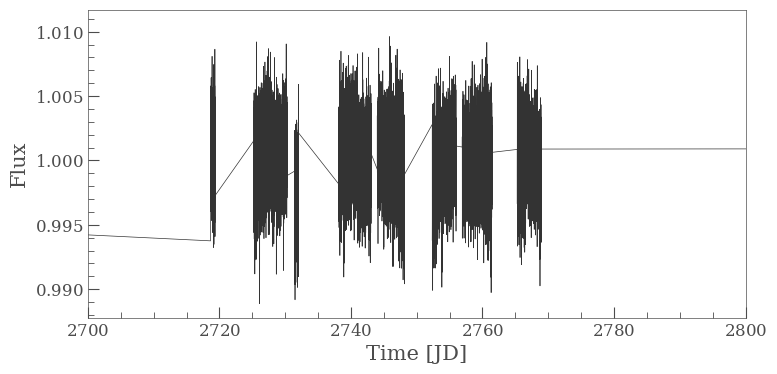

In [8]:
lc_4438.plot()
plt.xlim(2700, 2800)

In [9]:
# search_442 = lk.search_lightcurve('TIC 70899085')
# search_442

In [10]:
# lc_442 = lk.search_lightcurve('TIC 70899085', author='SPOC', exptime=120).download_all(flux_column="pdcsap_flux").stitch().remove_nans().normalize().remove_outliers()

read_file = pd.read_csv('./data/toi442/lc.csv')
lc_442 = lk.LightCurve(time=read_file['time'], flux=read_file['flux'], flux_err=read_file['flux_err'])

<Axes: xlabel='Time [JD]', ylabel='Flux'>

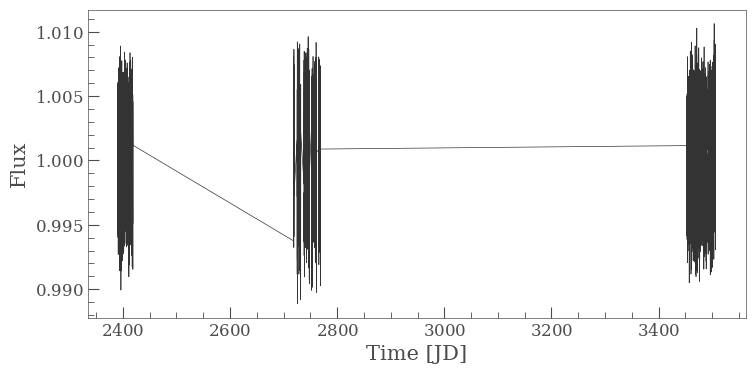

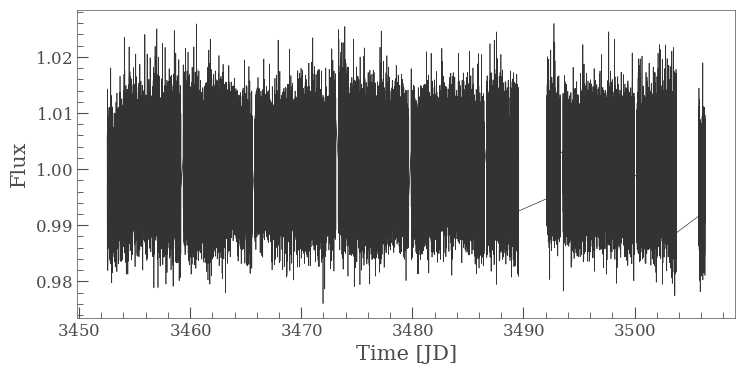

In [11]:
lc_4438.plot()
lc_4438_2.plot()

<Axes: xlabel='Time [JD]', ylabel='Flux'>

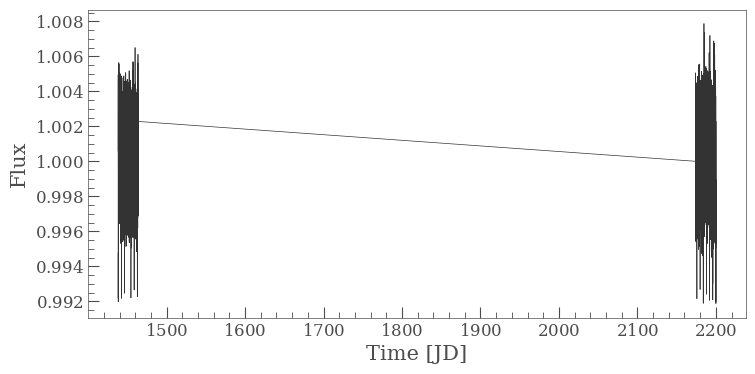

In [12]:
lc_442.plot()

# TLS

In [13]:
from transitleastsquares import (
    transitleastsquares,
    cleaned_array,
    catalog_info,
    transit_mask
    )

## TOI-4438

In [14]:
# lets recover first the planet detected by TESS 
lc_4438_t, lc_4438_f, lc_4438_f_err = cleaned_array(lc_4438.time.value, lc_4438.flux, lc_4438.flux_err)

# catalog_info: ab, mass, mass_min, mass_max, radius, radius_min, radius_max
info_4438 = catalog_info(TIC_ID=TIC_ID_4438) # to put priors on search

tls_4438 = transitleastsquares(lc_4438_t, lc_4438_f, lc_4438_f_err)

# I searched from 0.1 to 30 and found the tess planet period

# results_4438 = tls_4438.power(u=list(info_4438[0]))
# print(results_4438.keys())
# print(results_4438)

In [15]:
#results_4438_dict = dict(results_4438)
import pickle   
# with open('./results/tls/tls_complete_4438.pkl', 'wb') as f:
#     pickle.dump(results_4438_dict, f)

with open('./results/tls/tls_complete_4438.pkl', 'rb') as f:
    results_4438_dict = pickle.load(f)

In [16]:
results_4438_dict.keys()
results_4438_dict

{'SDE': 59.23046574631713,
 'SDE_raw': 14.135490264986197,
 'chi2_min': 0.3840501032331921,
 'chi2red_min': 5.2183556610847345e-06,
 'period': 7.44638938696153,
 'period_uncertainty': 0.000657012459918338,
 'T0': 2396.4028181911876,
 'duration': 0.009639058707696555,
 'depth': 0.9962119993941828,
 'depth_mean': (0.9961256329285897, 0.00021610774203805955),
 'depth_mean_even': (0.995993988167855, 0.0002519393918414339),
 'depth_mean_odd': (0.9962713824851173, 0.00035893760526882604),
 'transit_depths': array([0.99721221, 0.99648166, 0.99712799, 0.99626854,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan

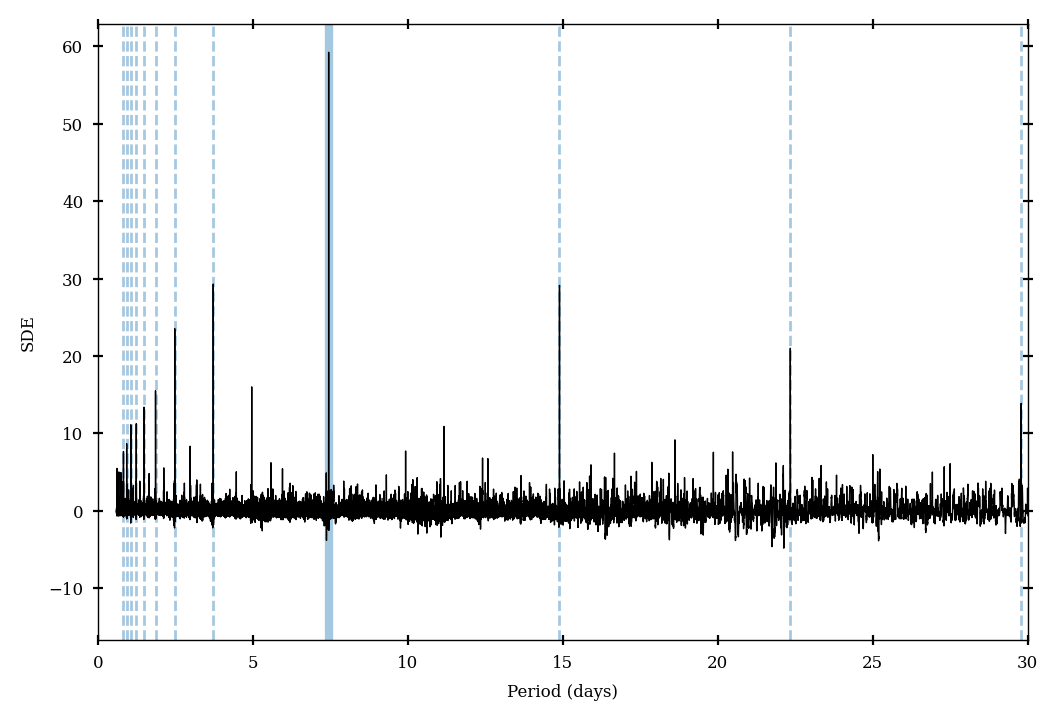

In [17]:
plt.figure()
ax = plt.gca()
ax.axvline(results_4438_dict['period'], alpha=0.4, lw=3)
plt.xlim(np.min(results_4438_dict['periods']), np.max(results_4438_dict['periods']))
for n in range(2, 10):
    ax.axvline(n*results_4438_dict['period'], alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(results_4438_dict['period'] / n, alpha=0.4, lw=1, linestyle="dashed")
plt.ylabel(r'SDE')
plt.xlabel('Period (days)')
plt.plot(results_4438_dict['periods'], results_4438_dict['power'], color='black', lw=0.5)
plt.xlim(0, 30);


''

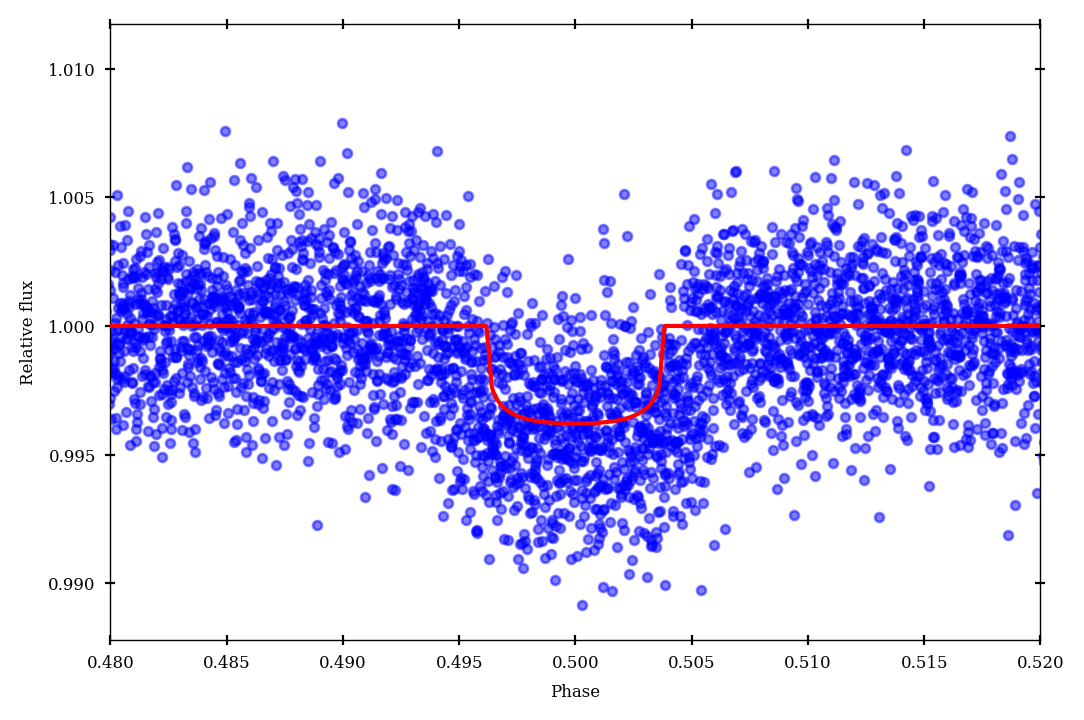

In [18]:
plt.figure()
plt.plot(results_4438_dict['model_folded_phase'], results_4438_dict['model_folded_model'], color='red', zorder=10)
plt.scatter(results_4438_dict['folded_phase'], results_4438_dict['folded_y'], color='blue', s=10, alpha=0.5, zorder=2)
plt.xlim(0.48, 0.52)
plt.xlabel('Phase')
plt.ylabel('Relative flux');
#plt.savefig('./plots/toi4438/tls/tls_4438_folded_phase.png', dpi=300, bbox_inches='tight')
;

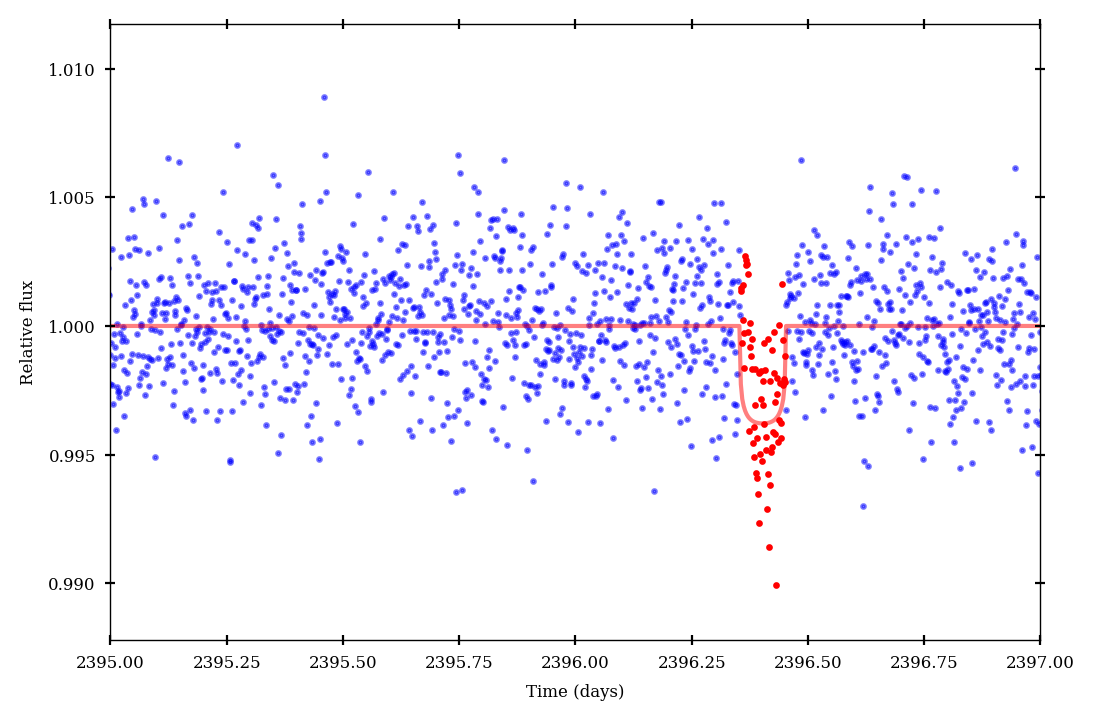

In [19]:
plt.figure()
in_transit_4438 = transit_mask(lc_4438_t, results_4438_dict['period'], 10*results_4438_dict['duration'], results_4438_dict['T0'])
plt.scatter(lc_4438_t[in_transit_4438], lc_4438_f[in_transit_4438], color='red', s=2, zorder=0)
plt.scatter(lc_4438_t[~in_transit_4438], lc_4438_f[~in_transit_4438], color='blue', alpha=0.5, s=2, zorder=0)
plt.plot(results_4438_dict['model_lightcurve_time'], results_4438_dict['model_lightcurve_model'], alpha=0.5, color='red', zorder=1)
plt.xlim(lc_4438_t.min(), lc_4438_t.max())
plt.xlabel('Time (days)')
plt.ylabel('Relative flux')
#plt.xlim(2730, 2735);
# plt.xlim(2385, 2420)
# plt.xlim(2402, 2405); # 2nd transit
plt.xlim(2395, 2397); # 1st transit
# plt.xlim(3471.4, 3471.8);
#plt.xlim(3450, 3500);

(3471.0, 3472.0)

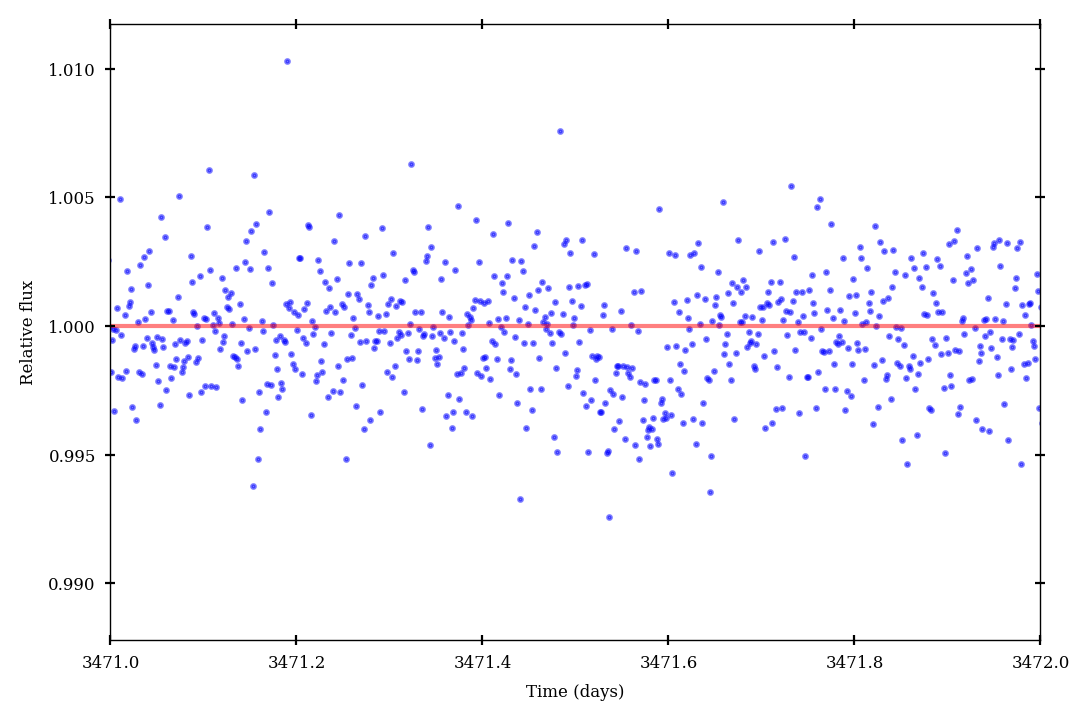

In [20]:
# there is an additional transit at 3471.58 !!
plt.figure()
plt.scatter(lc_4438_t[in_transit_4438], lc_4438_f[in_transit_4438], color='red', s=2, zorder=0)
plt.scatter(lc_4438_t[~in_transit_4438], lc_4438_f[~in_transit_4438], color='blue', alpha=0.5, s=2, zorder=0)
plt.plot(results_4438_dict['model_lightcurve_time'], results_4438_dict['model_lightcurve_model'], alpha=0.5, color='red', zorder=1)
plt.xlabel('Time (days)')
plt.ylabel('Relative flux')
plt.xlim(3471., 3472)

(3471.28, 3471.88)

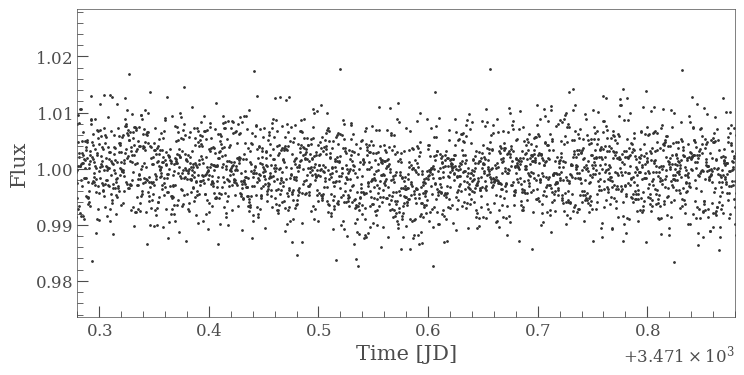

In [21]:
lc_4438_2.scatter()
plt.xlim(3471.28, 3471.88)

(0.985, 1.015)

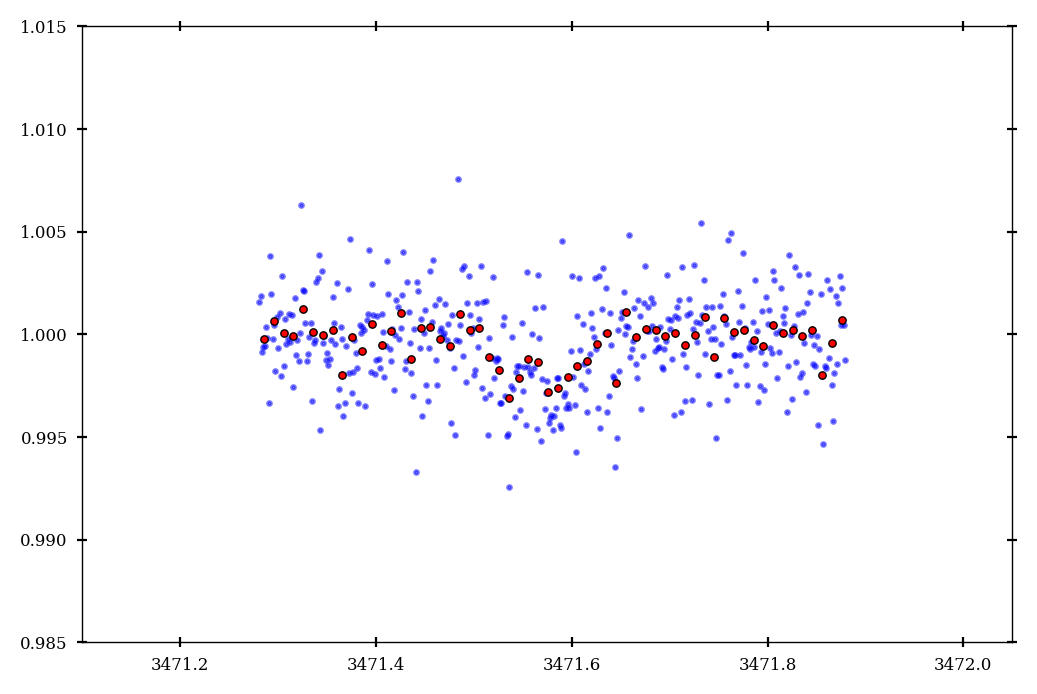

In [22]:
# lets filter and bin it
lc_4438_cut = lc_4438[lc_4438.time.value > 3471.28]
lc_4438_cut = lc_4438_cut[lc_4438_cut.time.value < 3471.88]
time_bin_size = 0.01  # in days
lc_4438_cut_binned = lc_4438_cut.bin(time_bin_size=time_bin_size)

plt.figure()
plt.scatter(lc_4438_cut.time.value, lc_4438_cut.flux, color='blue', alpha=0.5, s=2, zorder=0)
plt.scatter(lc_4438_cut_binned.time.value, lc_4438_cut_binned.flux, color='red', s=7, edgecolors='k', linewidths=0.5)
plt.xlim(3471.1, 3472.05)
plt.ylim(0.985, 1.015)
# plt.savefig('./plots/toi4438/tls/toi4438_other_transit.png', dpi=200, bbox_inches='tight')

Period 7.44639 d at T0= 2396.4028181911876
150 transit times in time series: ['2396.40282', '2403.84921', '2411.29560', '2418.74199', '2426.18838', '2433.63477', '2441.08115', '2448.52754', '2455.97393', '2463.42032', '2470.86671', '2478.31310', '2485.75949', '2493.20588', '2500.65227', '2508.09866', '2515.54505', '2522.99144', '2530.43783', '2537.88422', '2545.33061', '2552.77700', '2560.22338', '2567.66977', '2575.11616', '2582.56255', '2590.00894', '2597.45533', '2604.90172', '2612.34811', '2619.79450', '2627.24089', '2634.68728', '2642.13367', '2649.58006', '2657.02645', '2664.47284', '2671.91923', '2679.36561', '2686.81200', '2694.25839', '2701.70478', '2709.15117', '2716.59756', '2724.04395', '2731.49034', '2738.93673', '2746.38312', '2753.82951', '2761.27590', '2768.72229', '2776.16868', '2783.61507', '2791.06146', '2798.50785', '2805.95423', '2813.40062', '2820.84701', '2828.29340', '2835.73979', '2843.18618', '2850.63257', '2858.07896', '2865.52535', '2872.97174', '2880.41813'

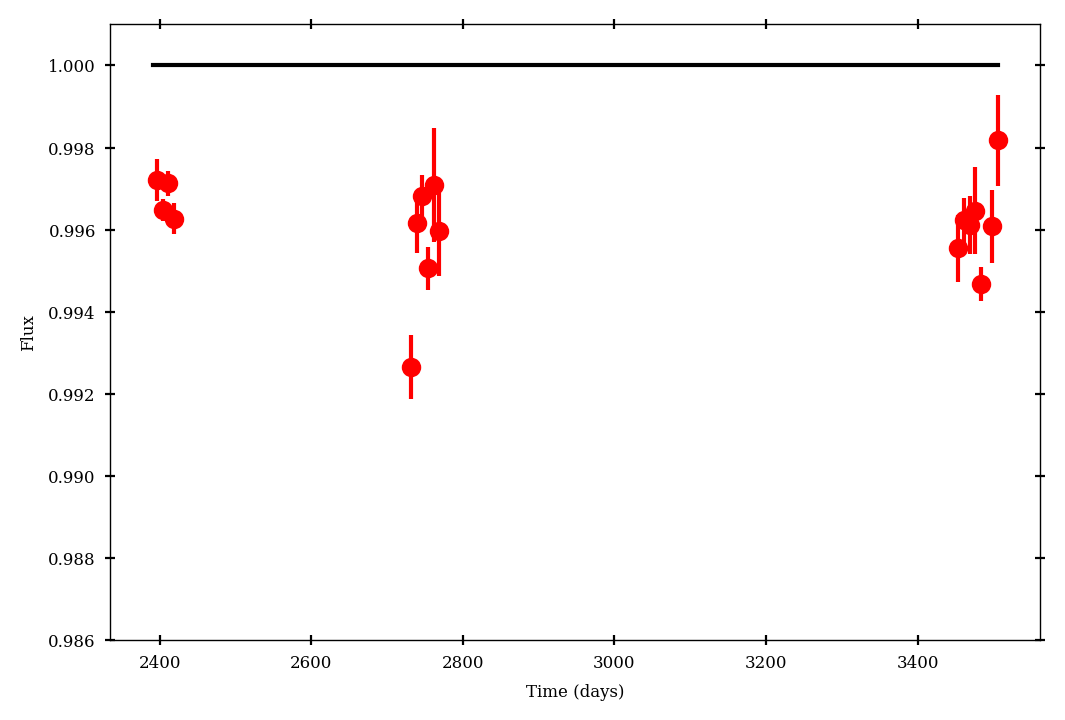

In [23]:
print('Period', format(results_4438_dict['period'], '.5f'), 'd at T0=', results_4438_dict['T0'])
print(len(results_4438_dict['transit_times']), 'transit times in time series:', ['{0:0.5f}'.format(i) for i in results_4438_dict['transit_times']])
print('Number of data points during each unique transit', results_4438_dict['per_transit_count'])
print('The number of transits with intransit data points', results_4438_dict['distinct_transit_count'])
print('The number of transits with no intransit data points', results_4438_dict['empty_transit_count'])
print('Transit depth', format(results_4438_dict['depth'], '.5f'), '(at the transit bottom)')
print('Transit duration (days)', format(results_4438_dict['duration'], '.5f'))
print('Transit depths (mean)', results_4438_dict['transit_depths'])
print('Transit depth uncertainties', results_4438_dict['transit_depths_uncertainties'])

plt.figure()
plt.errorbar(
    results_4438_dict['transit_times'],
    results_4438_dict['transit_depths'],
    yerr=results_4438_dict['transit_depths_uncertainties'],
    fmt='o', color='red')
plt.plot(
    (lc_4438_t.min(), lc_4438_t.max()),
    (np.mean(results_4438_dict['transit_depths']), np.mean(results_4438_dict['transit_depths'])),
     color='black', linestyle='dashed')
plt.plot((lc_4438_t.min(), lc_4438_t.max()), (1, 1), color='black')
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.ylim(0.986,1.001);

### Search 2

In [24]:
# filter out the first planet transits
tls_4438_2 = transitleastsquares(lc_4438_t[~in_transit_4438], lc_4438_f[~in_transit_4438], lc_4438_f_err[~in_transit_4438])

In [25]:
# I limit the searct to max period of 30 days, (I first search to 600 but there is nothing)
# results_4438_2 = tls_4438_2.power(period_max=30.0)
# print(results_4438_2.keys())
# print(results_4438_2)

In [26]:
# results_4438_2_dict = dict(results_4438_2)
 
# with open('./results/tls/tls_complete_4438_2.pkl', 'wb') as f:
#     pickle.dump(results_4438_2_dict, f)

with open('./results/tls/tls_complete_4438_2.pkl', 'rb') as f:
    results_4438_2_dict = pickle.load(f)
results_4438_2_dict

{'SDE': 11.81920483722167,
 'SDE_raw': 9.36915552763034,
 'chi2_min': 0.3747391246600741,
 'chi2red_min': 5.174310987670686e-06,
 'period': 24.601276910820673,
 'period_uncertainty': 0.013741543991891092,
 'T0': 2411.971269614768,
 'duration': 0.05844063309348729,
 'depth': 0.9989328264855812,
 'depth_mean': (0.9991042159852528, 0.00019368874893428223),
 'depth_mean_even': (0.9999422040723619, 0.00025427655973385416),
 'depth_mean_odd': (0.9982662278981436, 0.0002620784942806713),
 'transit_depths': array([1.00000864,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan, 0.99728589,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan, 

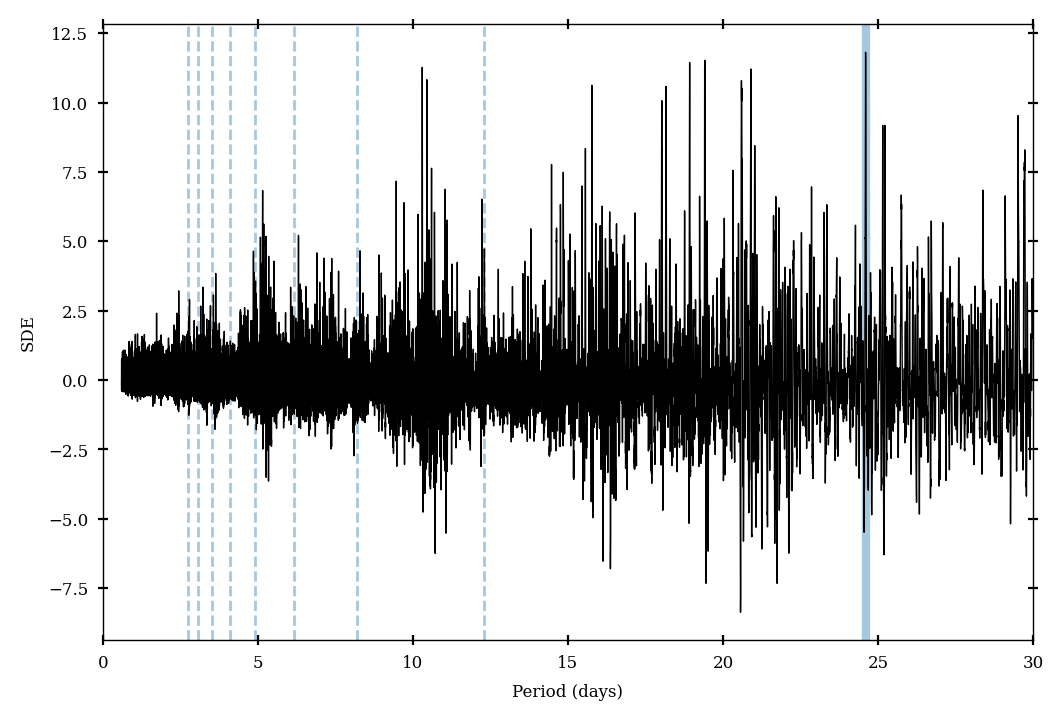

In [27]:
plt.figure()
ax = plt.gca()
ax.axvline(results_4438_2_dict['period'], alpha=0.4, lw=3)
plt.xlim(np.min(results_4438_2_dict['periods']), np.max(results_4438_2_dict['periods']))
for n in range(2, 10):
    ax.axvline(n*results_4438_2_dict['period'], alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(results_4438_2_dict['period'] / n, alpha=0.4, lw=1, linestyle="dashed")
plt.ylabel(r'SDE')
plt.xlabel('Period (days)')
plt.plot(results_4438_2_dict['periods'], results_4438_2_dict['power'], color='black', lw=0.5)
plt.xlim(0, max(results_4438_2_dict['periods']));
plt.xlim(0, 30);

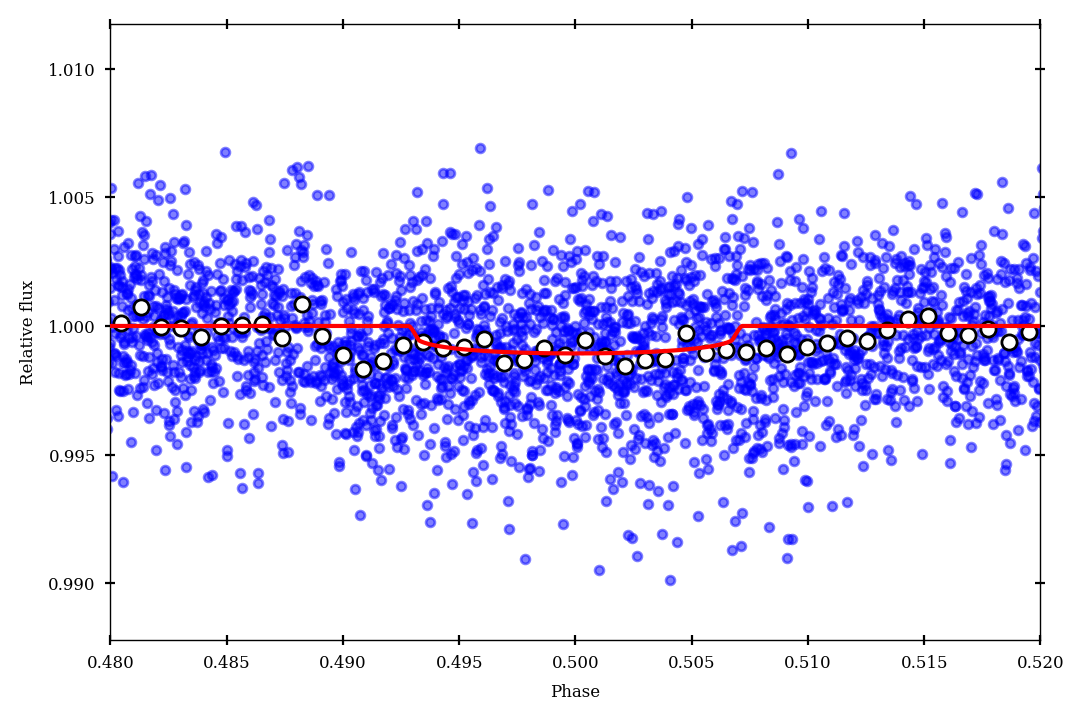

In [28]:
from scipy.stats import binned_statistic
bin_width = 30 / (24 * 60 * 24)  
bins = np.arange(0.48, 0.52 + bin_width, bin_width)

binned_means, bin_edges, _ = binned_statistic(
    results_4438_2_dict['folded_phase'],
    results_4438_2_dict['folded_y'],
    statistic='mean',
    bins=bins
)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure()
plt.plot(results_4438_2_dict['model_folded_phase'], results_4438_2_dict['model_folded_model'], color='red', zorder=10, label='Model')
plt.scatter(results_4438_2_dict['folded_phase'], results_4438_2_dict['folded_y'], color='blue', s=10, alpha=0.5, zorder=2, label='Data')
plt.scatter(bin_centers, binned_means, color='white', s=30, edgecolor='black', zorder=5, label='Binned Data')
plt.xlim(0.48, 0.52)
plt.xlabel('Phase')
plt.ylabel('Relative flux');

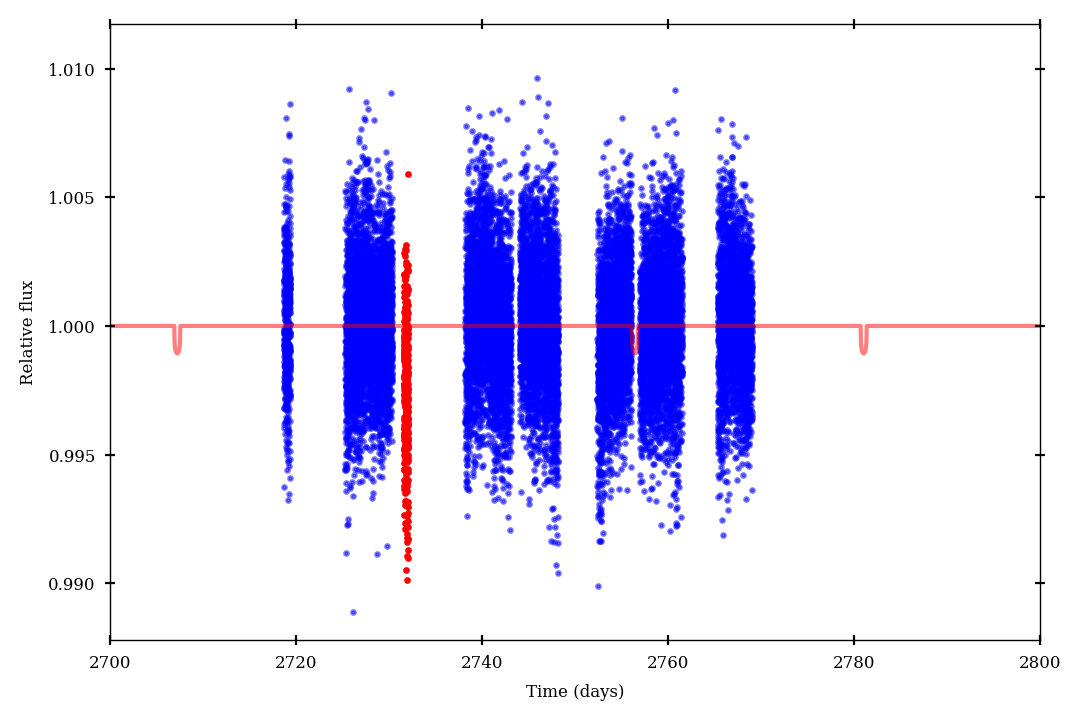

In [29]:
plt.figure()
in_transit_4438_2 = transit_mask(lc_4438_t[~in_transit_4438], results_4438_2_dict['period'], 10*results_4438_2_dict['duration'], results_4438_2_dict['T0'])

plt.scatter(lc_4438_t[~in_transit_4438][in_transit_4438_2], lc_4438_f[~in_transit_4438][in_transit_4438_2], color='red', s=2, zorder=0)
plt.scatter(lc_4438_t[~in_transit_4438][~in_transit_4438_2], lc_4438_f[~in_transit_4438][~in_transit_4438_2], color='blue', alpha=0.5, s=2, zorder=0)
plt.plot(results_4438_2_dict['model_lightcurve_time'], results_4438_2_dict['model_lightcurve_model'], alpha=0.5, color='red', zorder=1)
plt.xlim(lc_4438_t[~in_transit_4438].min(), lc_4438_t[~in_transit_4438].max())
plt.xlabel('Time (days)')
plt.ylabel('Relative flux')
#plt.xlim(2410, 2415)
plt.xlim(2700, 2800);

## TOI-442

In [30]:
# lets recover first the planet detected by TESS 
lc_442_t, lc_442_f, lc_442_f_err = cleaned_array(lc_442.time.value, lc_442.flux, lc_442.flux_err)

# catalog_info: ab, mass, mass_min, mass_max, radius, radius_min, radius_max
info_442 = catalog_info(TIC_ID=TIC_ID_442) # to put priors on search

tls_442 = transitleastsquares(lc_442_t, lc_442_f, lc_442_f_err)

In [31]:
# I searched with no limit on period (baseline) and found the tess planet period
# results_442 = tls_442.power(u=list(info_442[0]))

In [32]:
# results_442_dict = dict(results_442)
 
# with open('./results/tls/tls_complete_442.pkl', 'wb') as f:
#     pickle.dump(results_442_dict, f)

with open('./results/tls/tls_complete_442.pkl', 'rb') as f:
    results_442_dict = pickle.load(f)

results_442_dict.keys()
results_442_dict

{'SDE': 64.36412438677563,
 'SDE_raw': 24.44221462097018,
 'chi2_min': 0.08572600563644026,
 'chi2red_min': 2.4801390318657676e-06,
 'period': 4.05207220998396,
 'period_uncertainty': 0.00032056870157459727,
 'T0': 1438.3808123817212,
 'duration': 0.003499671379386358,
 'depth': 0.9948902960237005,
 'depth_mean': (0.9946942648717335, 0.00030053480798394866),
 'depth_mean_even': (0.9946955442428589, 0.0003886412845227719),
 'depth_mean_odd': (0.9946925590435663, 0.00047247113750078314),
 'transit_depths': array([0.99516686, 0.99346954, 0.99511304,        nan, 0.99679339,
        0.99525487, 0.99520012,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               

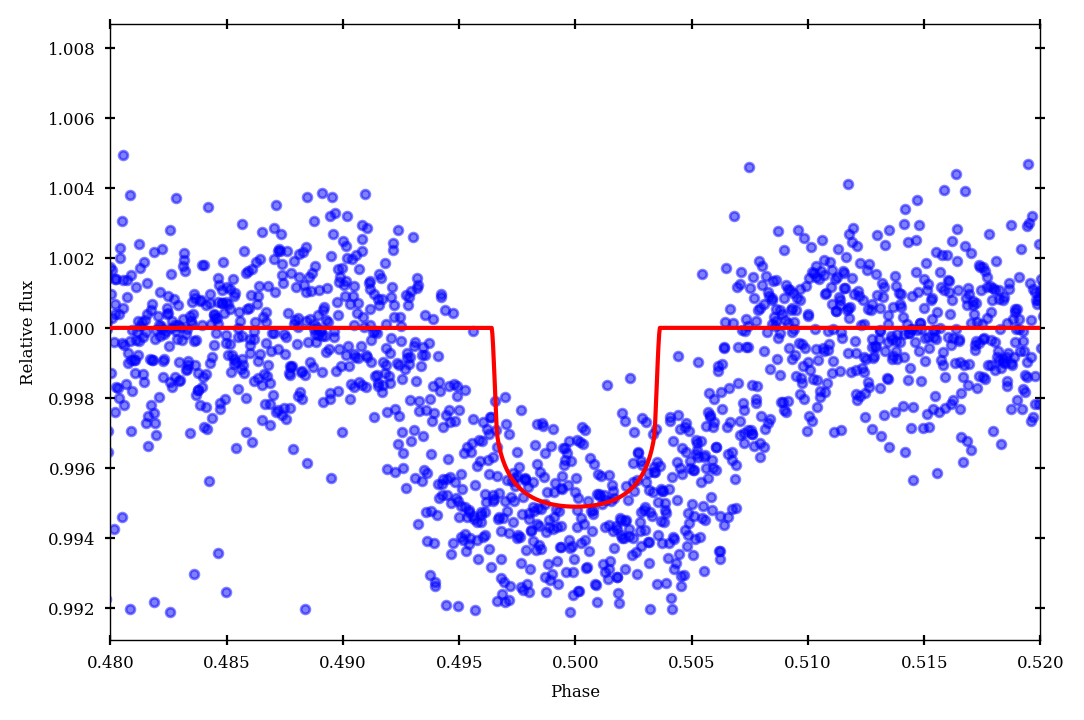

In [33]:
plt.figure()
plt.plot(results_442_dict['model_folded_phase'], results_442_dict['model_folded_model'], color='red', zorder=10)
plt.scatter(results_442_dict['folded_phase'], results_442_dict['folded_y'], color='blue', s=10, alpha=0.5, zorder=2)
plt.xlim(0.48, 0.52)
plt.xlabel('Phase')
plt.ylabel('Relative flux');
# plt.savefig('./plots/toi442/tls/tls_442_folded_phase.png', dpi=300, bbox_inches='tight')

(1442.0, 1443.0)

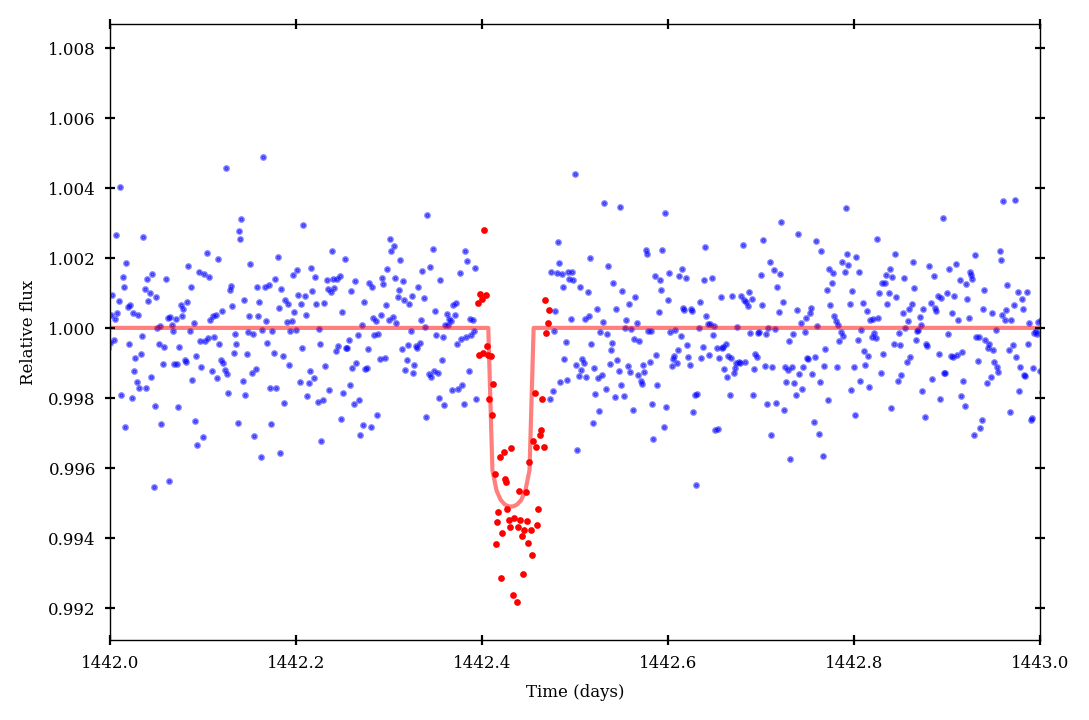

In [34]:
plt.figure()
in_transit_442 = transit_mask(lc_442_t, results_442_dict['period'], 22*results_442_dict['duration'], results_442_dict['T0'])
plt.scatter(lc_442_t[in_transit_442], lc_442_f[in_transit_442], color='red', s=2, zorder=0)
plt.scatter(lc_442_t[~in_transit_442], lc_442_f[~in_transit_442], color='blue', alpha=0.5, s=2, zorder=0)
plt.plot(results_442_dict['model_lightcurve_time'], results_442_dict['model_lightcurve_model'], alpha=0.5, color='red', zorder=1)
plt.xlim(lc_442_t.min(), lc_442_t.max())
plt.xlabel('Time (days)')
plt.ylabel('Relative flux')
plt.xlim(1430,1470)
plt.xlim(1442,1443)

Period 4.05207 d at T0= 1438.3808123817212
188 transit times in time series: ['1438.38081', '1442.43288', '1446.48496', '1450.53703', '1454.58910', '1458.64117', '1462.69325', '1466.74532', '1470.79739', '1474.84946', '1478.90153', '1482.95361', '1487.00568', '1491.05775', '1495.10982', '1499.16190', '1503.21397', '1507.26604', '1511.31811', '1515.37018', '1519.42226', '1523.47433', '1527.52640', '1531.57847', '1535.63055', '1539.68262', '1543.73469', '1547.78676', '1551.83883', '1555.89091', '1559.94298', '1563.99505', '1568.04712', '1572.09920', '1576.15127', '1580.20334', '1584.25541', '1588.30748', '1592.35956', '1596.41163', '1600.46370', '1604.51577', '1608.56785', '1612.61992', '1616.67199', '1620.72406', '1624.77613', '1628.82821', '1632.88028', '1636.93235', '1640.98442', '1645.03650', '1649.08857', '1653.14064', '1657.19271', '1661.24478', '1665.29686', '1669.34893', '1673.40100', '1677.45307', '1681.50514', '1685.55722', '1689.60929', '1693.66136', '1697.71343', '1701.76551'

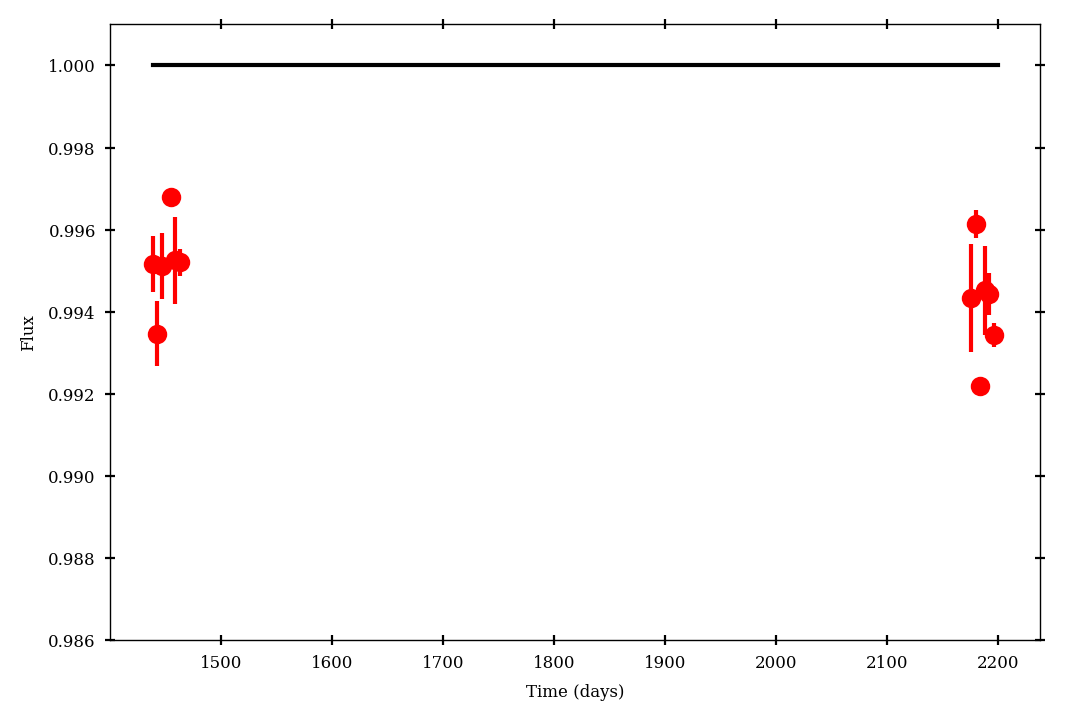

In [35]:
print('Period', format(results_442_dict['period'], '.5f'), 'd at T0=', results_442_dict['T0'])
print(len(results_442_dict['transit_times']), 'transit times in time series:', ['{0:0.5f}'.format(i) for i in results_442_dict['transit_times']])
print('Number of data points during each unique transit', results_442_dict['per_transit_count'])
print('The number of transits with intransit data points', results_442_dict['distinct_transit_count'])
print('The number of transits with no intransit data points', results_442_dict['empty_transit_count'])
print('Transit depth', format(results_442_dict['depth'], '.5f'), '(at the transit bottom)')
print('Transit duration (days)', format(results_442_dict['duration'], '.5f'))
print('Transit depths (mean)', results_442_dict['transit_depths'])
print('Transit depth uncertainties', results_442_dict['transit_depths_uncertainties'])

plt.figure()
plt.errorbar(
    results_442_dict['transit_times'],
    results_442_dict['transit_depths'],
    yerr=results_442_dict['transit_depths_uncertainties'],
    fmt='o', color='red')
plt.plot(
    (lc_442_t.min(), lc_442_t.max()),
    (np.mean(results_442_dict['transit_depths']), np.mean(results_442_dict['transit_depths'])),
     color='black', linestyle='dashed')
plt.plot((lc_442_t.min(), lc_442_t.max()), (1, 1), color='black')
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.ylim(0.986,1.001);

In [36]:
results_4438_dict.keys()

dict_keys(['SDE', 'SDE_raw', 'chi2_min', 'chi2red_min', 'period', 'period_uncertainty', 'T0', 'duration', 'depth', 'depth_mean', 'depth_mean_even', 'depth_mean_odd', 'transit_depths', 'transit_depths_uncertainties', 'rp_rs', 'snr', 'snr_per_transit', 'snr_pink_per_transit', 'odd_even_mismatch', 'transit_times', 'per_transit_count', 'transit_count', 'distinct_transit_count', 'empty_transit_count', 'FAP', 'in_transit_count', 'after_transit_count', 'before_transit_count', 'periods', 'power', 'power_raw', 'SR', 'chi2', 'chi2red', 'model_lightcurve_time', 'model_lightcurve_model', 'model_folded_phase', 'folded_y', 'folded_dy', 'folded_phase', 'model_folded_model'])

In [37]:
obs_transit_mask_4438 = results_4438_dict['snr_per_transit'] != 0.
obs_transit_mask_442 = results_442_dict['snr_per_transit'] != 0.

In [38]:
obs_transit_times_4438 = np.array(results_4438_dict['transit_times'])[obs_transit_mask_4438]
obs_transit_times_442 = np.array(results_442_dict['transit_times'])[obs_transit_mask_442]
print(results_4438_dict['distinct_transit_count'])
print(len(obs_transit_times_4438))
print(results_442_dict['distinct_transit_count'])
print(len(obs_transit_times_442))

17
17
12
12


### Search 2

In [39]:
# filter out the first planet transits
# tls_442_2 = transitleastsquares(lc_442_t[~in_transit_442], lc_442_f[~in_transit_442], lc_442_f_err[~in_transit_442])

In [40]:
# results_442_2 = tls_442_2.power()
# print(results_442_2.keys())
# print(results_442_2)

In [41]:
# results_442_2_dict = dict(results_442_2)
 
# with open('./results/tls/tls_complete_442_2.pkl', 'wb') as f:
#     pickle.dump(results_442_2_dict, f)

with open('./results/tls/tls_complete_442_2.pkl', 'rb') as f:
    results_442_2_dict = pickle.load(f)
results_442_2_dict

{'SDE': 16.290718087706136,
 'SDE_raw': 5.572129795674104,
 'chi2_min': 0.08182289329648253,
 'chi2red_min': 2.4121604108511696e-06,
 'period': 16.651060158823757,
 'period_uncertainty': 0.014769406599182133,
 'T0': 1450.6627486689604,
 'duration': 0.04405267716724233,
 'depth': 0.998637571525237,
 'depth_mean': (0.9991385331377387, 0.0001876381396754963),
 'depth_mean_even': (0.9992365706712008, 0.0002300174271339071),
 'depth_mean_odd': (0.9990404956042767, 0.00029550559924519925),
 'transit_depths': array([       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               na

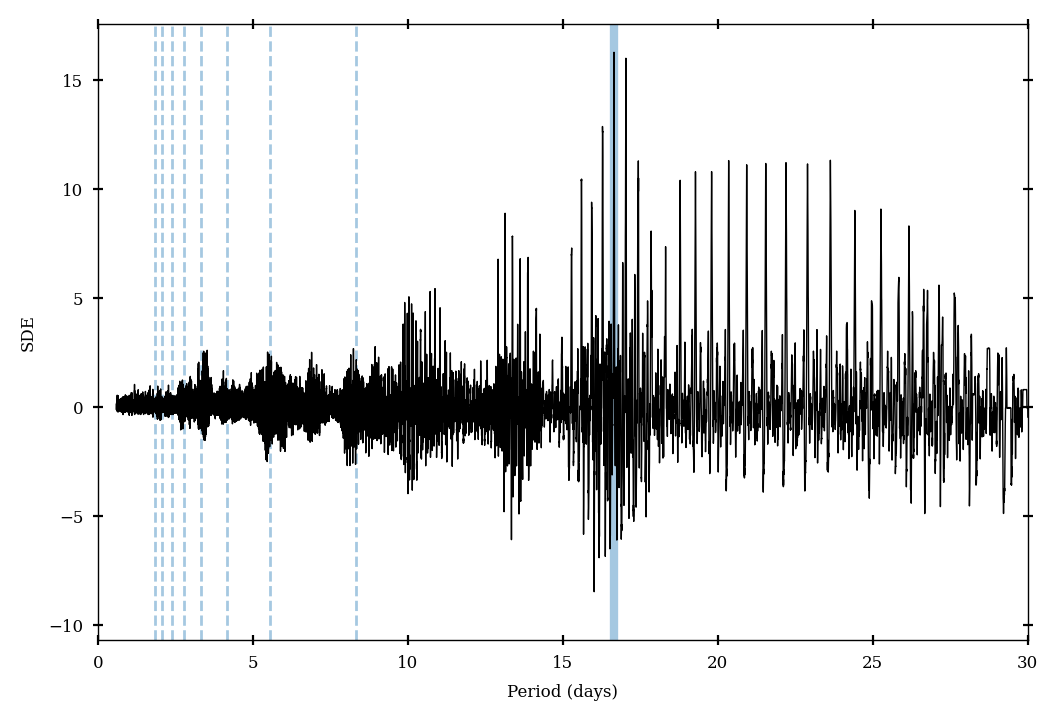

In [42]:
plt.figure()
ax = plt.gca()
ax.axvline(results_442_2_dict['period'], alpha=0.4, lw=3)
plt.xlim(np.min(results_442_2_dict['periods']), np.max(results_442_2_dict['periods']))
for n in range(2, 10):
    ax.axvline(n*results_442_2_dict['period'], alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(results_442_2_dict['period'] / n, alpha=0.4, lw=1, linestyle="dashed")
plt.ylabel(r'SDE')
plt.xlabel('Period (days)')
plt.plot(results_442_2_dict['periods'], results_442_2_dict['power'], color='black', lw=0.5)
plt.xlim(0, max(results_442_2_dict['periods']));
plt.xlim(0, 30);

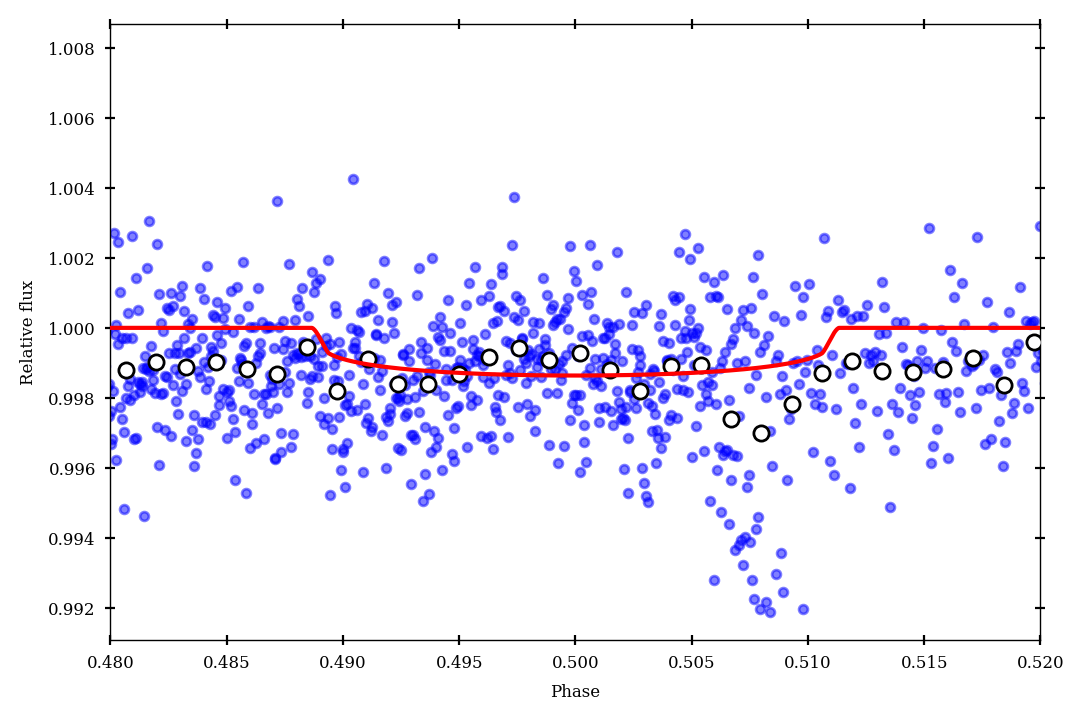

In [43]:
from scipy.stats import binned_statistic
bin_width = 30 / (24 * 60 * 16)  
bins = np.arange(0.48, 0.52 + bin_width, bin_width)

binned_means, bin_edges, _ = binned_statistic(
    results_442_2_dict['folded_phase'],
    results_442_2_dict['folded_y'],
    statistic='mean',
    bins=bins
)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure()
plt.plot(results_442_2_dict['model_folded_phase'], results_442_2_dict['model_folded_model'], color='red', zorder=10, label='Model')
plt.scatter(results_442_2_dict['folded_phase'], results_442_2_dict['folded_y'], color='blue', s=10, alpha=0.5, zorder=2, label='Data')
plt.scatter(bin_centers, binned_means, color='white', s=30, edgecolor='black', zorder=5, label='Binned Data')
plt.xlim(0.48, 0.52)
plt.xlabel('Phase')
plt.ylabel('Relative flux');

Text(0, 0.5, 'Relative flux')

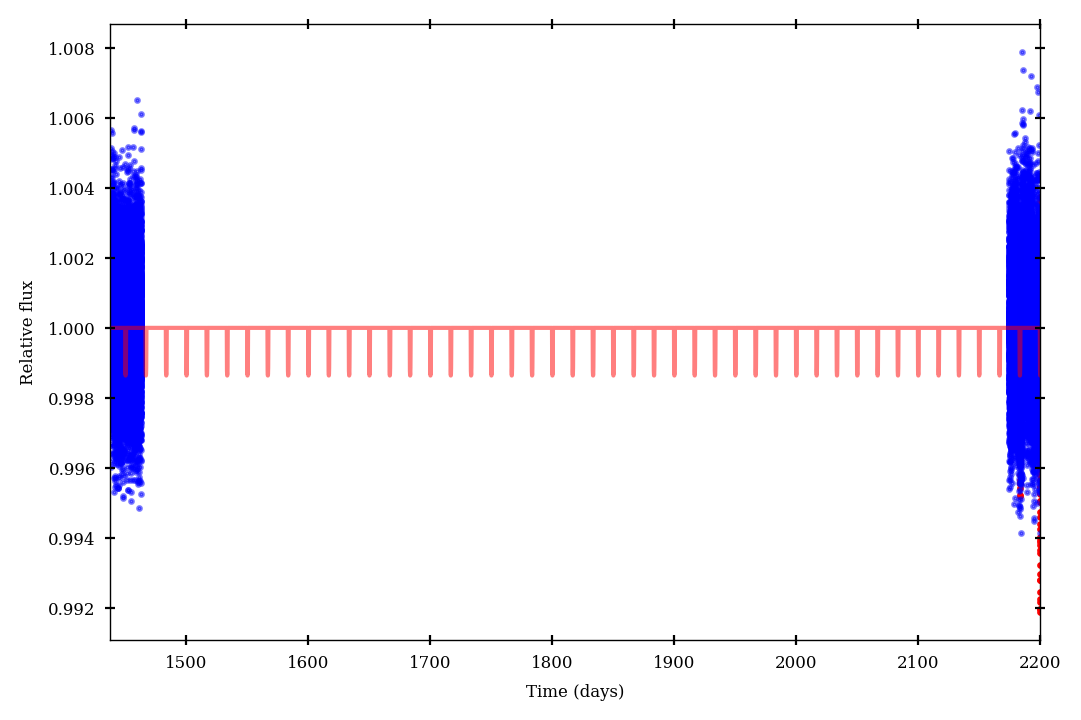

In [44]:
plt.figure()
in_transit_442_2 = transit_mask(lc_442_t[~in_transit_442], results_442_2_dict['period'], 10*results_442_2_dict['duration'], results_442_2_dict['T0'])

plt.scatter(lc_442_t[~in_transit_442][in_transit_442_2], lc_442_f[~in_transit_442][in_transit_442_2], color='red', s=2, zorder=0)
plt.scatter(lc_442_t[~in_transit_442][~in_transit_442_2], lc_442_f[~in_transit_442][~in_transit_442_2], color='blue', alpha=0.5, s=2, zorder=0)
plt.plot(results_442_2_dict['model_lightcurve_time'], results_442_2_dict['model_lightcurve_model'], alpha=0.5, color='red', zorder=1)
plt.xlim(lc_442_t[~in_transit_442].min(), lc_442_t[~in_transit_442].max())
plt.xlabel('Time (days)')
plt.ylabel('Relative flux')
#plt.xlim(2180, 2185)
#plt.xlim(1450, 1500);

# Sectors fig

In [45]:
# read gp light curves
read_gp_442 = pd.read_csv('./data/toi442/gp_lc_2min.csv')
gplc_442 = lk.LightCurve(time=read_gp_442['time']+np.min(lc_442.time.value), flux=read_gp_442['flux'])

In [46]:
read_gp_4438 = pd.read_csv('./data/toi4438/gp_lc_2min.csv')
gplc_4438 = lk.LightCurve(time=read_gp_4438['time']+np.min(lc_4438.time.value), flux=read_gp_4438['flux'])

/tmp/ipykernel_1062521/2930512647.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


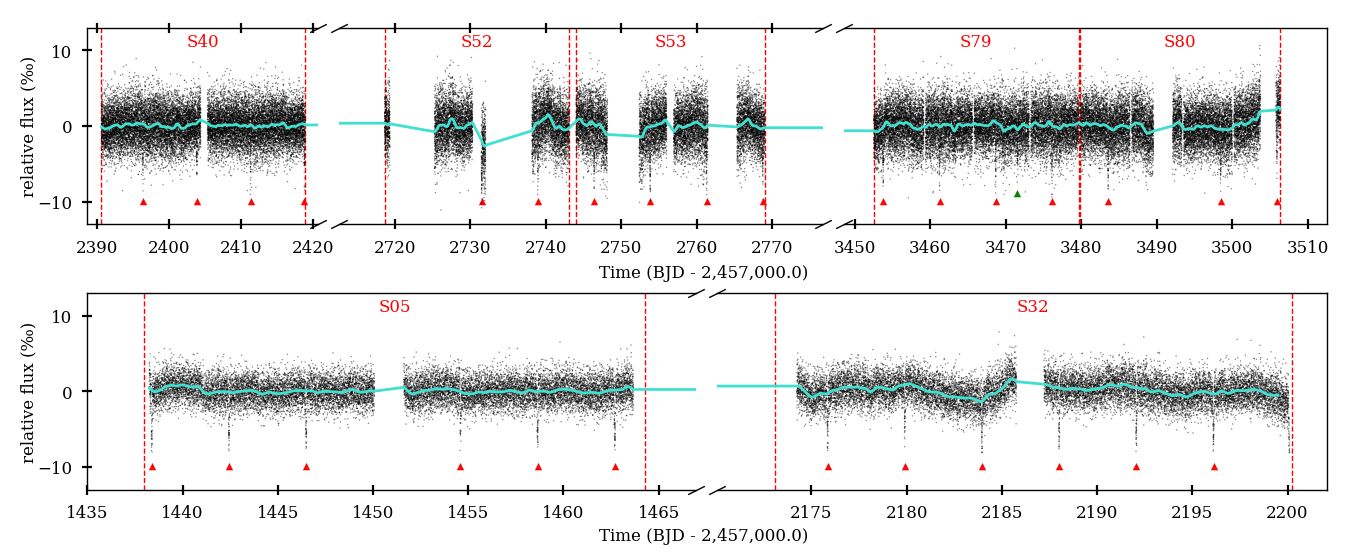

In [ ]:
fig = plt.figure(figsize=(8, 3), dpi=200)
gs = fig.add_gridspec(2, 10, width_ratios= [1,1,1,1,1,1,1,1,1,1], height_ratios= [1,1], wspace=0.2, hspace=0.35)
ax0_0 = fig.add_subplot(gs[0, 0:2])
ax0_1 = fig.add_subplot(gs[0, 2:6])
ax0_2 = fig.add_subplot(gs[0, 6:10])
ax1_0 = fig.add_subplot(gs[1, 0:5])
ax1_1 = fig.add_subplot(gs[1, 5:10])
marker = '.'
size = 1
alpha = 0.5 
# y_lims = (0.987, 1.013)
y_lims = ((0.987-1.0)*1e3, (1.013-1.0)*1e3)
gpc = 'turquoise'
ax0_0.spines.right.set_visible(False)
ax0_1.spines.left.set_visible(False)
ax0_1.spines.right.set_visible(False)
ax0_2.spines.left.set_visible(False)
ax1_0.spines.right.set_visible(False)
ax1_1.spines.left.set_visible(False)

d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=0.5, clip_on=False)
ax0_0.plot([1, 1], [0, 1], transform=ax0_0.transAxes, **kwargs)
ax0_1.plot([0, 0], [1, 0], transform=ax0_1.transAxes, **kwargs)
ax0_1.plot([1, 1], [0, 1], transform=ax0_1.transAxes, **kwargs)
ax0_2.plot([0, 0], [1, 0], transform=ax0_2.transAxes, **kwargs)
ax1_0.plot([1, 1], [0, 1], transform=ax1_0.transAxes, **kwargs)
ax1_1.plot([0, 0], [1, 0], transform=ax1_1.transAxes, **kwargs)

ax0_0.yaxis.tick_left()
ax0_1.yaxis.tick_left()
ax1_0.yaxis.tick_left()
ax1_1.yaxis.tick_right()
ax0_1.tick_params(labelleft=False, labelright=False)
ax0_2.tick_params(labelleft=False, labelright=False)
ax1_0.tick_params(labelleft=True, labelright=False)
ax0_1.yaxis.set_ticks_position('none')
ax0_2.yaxis.set_ticks_position('none')
ax0_2.xaxis.set_ticks_position('bottom')
ax1_0.xaxis.set_ticks_position('bottom')
ax1_1.xaxis.set_ticks_position('bottom')
ax1_0.yaxis.set_ticks_position('left')
ax1_1.yaxis.set_ticks_position('right')
ax1_1.tick_params(labelleft=False, labelright=False)
ax1_1.yaxis.set_ticks_position('none')

ax0_0.scatter(lc_4438.time.value, (lc_4438.flux.value-1.0)*1e3, s=size, color='k', marker=marker, edgecolors='none', alpha=alpha, label='SPOC 120s cadence', zorder=20)
ax0_0.plot(gplc_4438.time.value, gplc_4438.flux.value, c=gpc, zorder=100, lw=1)
ax0_0.set_xlim(sectors_times_btjd_4438[0]-2, sectors_times_btjd_4438[0]+30)
ax0_0.set_ylim(y_lims[0], y_lims[1])

ax0_1.scatter(lc_4438.time.value, (lc_4438.flux.value-1.0)*1e3, s=size, color='k', marker=marker, edgecolors='none', alpha=alpha, label='SPOC 120s cadence', zorder=20)
ax0_1.plot(gplc_4438.time.value, gplc_4438.flux.value, c=gpc, zorder=100, lw=1)
ax0_1.set_xlim(sectors_times_btjd_4438[2]-6, sectors_times_btjd_4438[2]+58)
ax0_1.set_ylim(y_lims[0], y_lims[1])

ax0_2.scatter(lc_4438.time.value, (lc_4438.flux.value-1.0)*1e3, s=size, color='k', marker=marker, edgecolors='none', alpha=alpha,  label='SPOC 120s cadence', zorder=20)
#ax0_2.scatter(lc_4438_2.time.value, lc_4438_2.flux.value, s=size, color='gray', marker=marker, edgecolors='none', alpha=alpha,  label='SPOC 20s cadence', zorder=10)
ax0_2.plot(gplc_4438.time.value, gplc_4438.flux.value, c=gpc, zorder=100, lw=1)
ax0_2.set_xlim(sectors_times_btjd_4438[6]-4, sectors_times_btjd_4438[6]+60)
ax0_2.set_ylim(y_lims[0], y_lims[1])

ax1_0.scatter(lc_442.time.value, (lc_442.flux.value-1.0)*1e3, s=size, color='k', marker=marker, edgecolors='none', alpha=alpha,  label='SPOC 120s cadence', zorder=20)
ax1_0.plot(gplc_442.time.value, gplc_442.flux.value, c=gpc, zorder=100, lw=1)
ax1_0.set_xlim(sectors_times_btjd_442[0]-3, sectors_times_btjd_442[0]+29)
ax1_0.set_ylim(y_lims[0], y_lims[1])

ax1_1.scatter(lc_442.time.value, (lc_442.flux.value-1.0)*1e3, s=size, color='k', marker=marker, edgecolors='none', alpha=alpha,  label='SPOC 120s cadence', zorder=20)
ax1_1.plot(gplc_442.time.value, gplc_442.flux.value, c=gpc, zorder=100, lw=1)
ax1_1.set_xlim(sectors_times_btjd_442[2]-3, sectors_times_btjd_442[2]+29)
ax1_1.set_ylim(y_lims[0], y_lims[1])
fig.tight_layout()
ax0_0.set_ylabel('relative flux (‰)', labelpad=0.1)
ax1_0.set_ylabel('relative flux (‰)', labelpad=0.1)
ax0_0.annotate('Time (BJD - 2,457,000.0)', xy=(0.44, 0.026), xycoords='figure fraction', ha='center', va='bottom', fontsize=SMALL_SIZE)
ax1_0.annotate('Time (BJD - 2,457,000.0)', xy=(0.44, 0.465), xycoords='figure fraction', ha='center', va='bottom', fontsize=SMALL_SIZE)

ax0_0.annotate('S40', xy=((sectors_times_btjd_4438[1]-sectors_times_btjd_4438[0])/2+sectors_times_btjd_4438[0], 10), 
            xycoords='data', ha='center', va='bottom', color='red', fontsize=SMALL_SIZE)
ax0_0.axvline(x=sectors_times_btjd_4438[0], color='red', linestyle='--', lw=0.5)
ax0_0.axvline(x=sectors_times_btjd_4438[1], color='red', linestyle='--', lw=0.5)
for j in obs_transit_times_4438:
    ax0_0.plot(j, -10, marker="^", color='red', ms=1)
    ax0_1.plot(j, -10, marker="^", color='red', ms=1)
    ax0_2.plot(j, -10, marker="^", color='red', ms=1)
for j in obs_transit_times_442:
    ax1_0.plot(j, -10, marker="^", color='red', ms=1)
    ax1_1.plot(j, -10, marker="^", color='red', ms=1)

ax0_2.plot(3471.559, -9, marker="^", color='green', ms=1)

ax0_1.annotate('S52', xy=((sectors_times_btjd_4438[3]-sectors_times_btjd_4438[2])/2+sectors_times_btjd_4438[2], 10), 
            xycoords='data', ha='center', va='bottom', color='red', fontsize=SMALL_SIZE)
ax0_1.axvline(x=sectors_times_btjd_4438[2], color='red', linestyle='--', lw=0.5)
ax0_1.axvline(x=sectors_times_btjd_4438[3], color='red', linestyle='--', lw=0.5)

ax0_1.annotate('S53', xy=((sectors_times_btjd_4438[5]-sectors_times_btjd_4438[4])/2+sectors_times_btjd_4438[4], 10), 
            xycoords='data', ha='center', va='bottom', color='red', fontsize=SMALL_SIZE)
ax0_1.axvline(x=sectors_times_btjd_4438[4], color='red', linestyle='--', lw=0.5)
ax0_1.axvline(x=sectors_times_btjd_4438[5], color='red', linestyle='--', lw=0.5)

ax0_2.annotate('S79', xy=((sectors_times_btjd_4438[7]-sectors_times_btjd_4438[6])/2+sectors_times_btjd_4438[6], 10), 
            xycoords='data', ha='center', va='bottom', color='red', fontsize=SMALL_SIZE)
ax0_2.axvline(x=sectors_times_btjd_4438[6], color='red', linestyle='--', lw=0.5)
ax0_2.axvline(x=sectors_times_btjd_4438[7], color='red', linestyle='--', lw=0.5)

ax0_2.annotate('S80', xy=((sectors_times_btjd_4438[9]-sectors_times_btjd_4438[8])/2+sectors_times_btjd_4438[8], 10), 
            xycoords='data', ha='center', va='bottom', color='red', fontsize=SMALL_SIZE)
ax0_2.axvline(x=sectors_times_btjd_4438[8], color='red', linestyle='--', lw=0.5)
ax0_2.axvline(x=sectors_times_btjd_4438[9], color='red', linestyle='--', lw=0.5)

ax1_0.annotate('S05', xy=((sectors_times_btjd_442[1]-sectors_times_btjd_442[0])/2+sectors_times_btjd_442[0], 10), 
            xycoords='data', ha='center', va='bottom', color='red', fontsize=SMALL_SIZE)
ax1_0.axvline(x=sectors_times_btjd_442[0], color='red', linestyle='--', lw=0.5)
ax1_0.axvline(x=sectors_times_btjd_442[1], color='red', linestyle='--', lw=0.5)

ax1_1.annotate('S32', xy=((sectors_times_btjd_442[3]-sectors_times_btjd_442[2])/2+sectors_times_btjd_442[2], 10), 
            xycoords='data', ha='center', va='bottom', color='red', fontsize=SMALL_SIZE)
ax1_1.axvline(x=sectors_times_btjd_442[2], color='red', linestyle='--', lw=0.5)
ax1_1.axvline(x=sectors_times_btjd_442[3], color='red', linestyle='--', lw=0.5)

# plt.savefig('plots/paper/tess_sectors.png', dpi=300, bbox_inches='tight')
plt.show()

# New transit

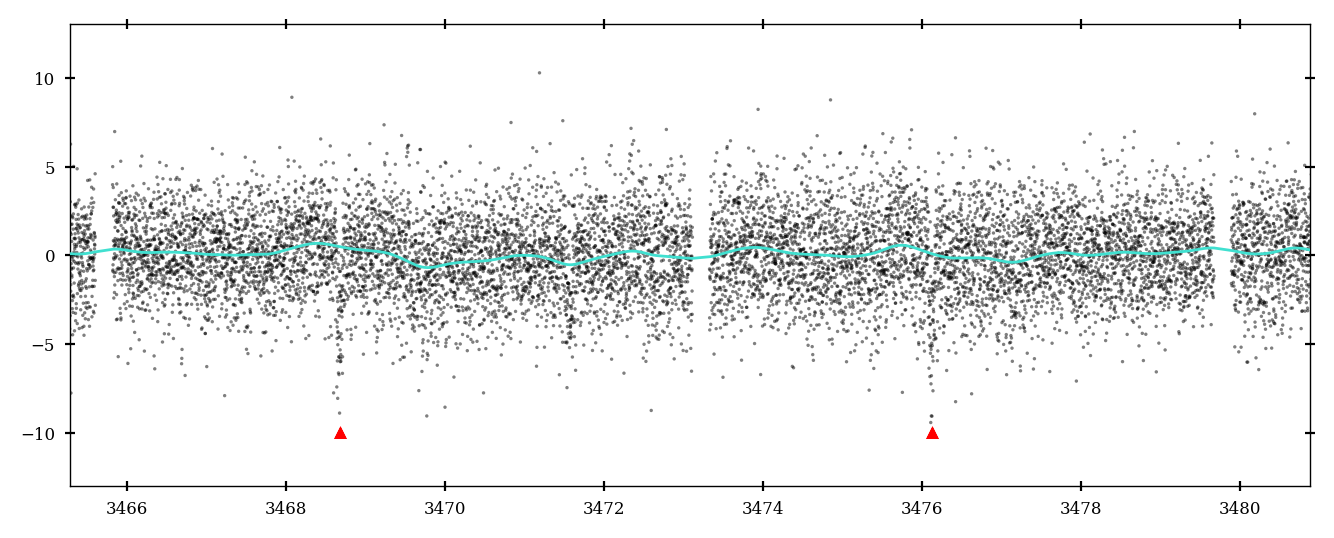

In [71]:
plt.figure(figsize=(8, 3), dpi=200)
plt.scatter(lc_4438.time.value, (lc_4438.flux.value-1.0)*1e3, s=6, color='k', marker=marker, edgecolors='none', alpha=alpha, zorder=20)
# plt.scatter(lc_4438_sap.time.value, lc_4438_sap.flux.value, s=size, color='k', marker=marker, edgecolors='none', alpha=alpha, zorder=20)
plt.plot(gplc_4438.time.value, gplc_4438.flux.value, c=gpc, zorder=100, lw=1)
# plt.xlim(sectors_times_btjd_4438[0]-2, sectors_times_btjd_4438[0]+30)
# plt.xlim(sectors_times_btjd_4438[2]-2, sectors_times_btjd_4438[2]+30)
plt.xlim(sectors_times_btjd_4438[6]-2, sectors_times_btjd_4438[6]+58)
plt.ylim(y_lims[0], y_lims[1])
plt.xlim(3465.28, 3480.88)
#plt.xlim(3480.28, 3490.88)
for j in obs_transit_times_4438:
    plt.plot(j, -10, marker="^", color='red', ms=3)
    plt.plot(j, -10, marker="^", color='red', ms=3)
    plt.plot(j, -10, marker="^", color='red', ms=3)
# plt.savefig('plots/toi4438/tls/other_transit_.png', dpi=300, bbox_inches='tight')


In [ ]:
# # detrended
# x = lc_4438.time.value[~in_transit_4438]
# y = lc_4438.flux.value[~in_transit_4438]-(gplc_4438.flux.value[~in_transit_4438]/1e3+1.0)
# yerr = lc_4438.flux_err.value[~in_transit_4438]

In [ ]:
# # see if we can detect it with TLS
# tls_2 = transitleastsquares(x, y, yerr)

# results_2 = tls_2.power(u=list(info_4438[0]), period_min=10.0, period_max=500.0)
# print(results_2.keys())
# print(results_2)

In [10]:
# save results
import pickle   
# with open('./results/tls/tls_detrended_noplanetb.pkl', 'wb') as f:
#     pickle.dump(results_2, f)

with open('./results/tls/tls_detrended_noplanetb.pkl', 'rb') as f:
    results_2 = pickle.load(f)

In [11]:
print(results_2)

{'SDE': 5.441160297413186, 'SDE_raw': 2.2414214695007373, 'chi2_min': 34189.329134083746, 'chi2red_min': 0.9481233814221782, 'period': 24.713008158293658, 'period_uncertainty': 0.025225530305851507, 'T0': 2400.874284441388, 'duration': 0.13421542527298194, 'depth': -0.12235758277776387, 'depth_mean': (0.0017740672785287518, 0.00011057573435469683), 'depth_mean_even': (0.0017103324875277412, 0.00012906180646272863), 'depth_mean_odd': (0.0019453545293439678, 0.0002123966865764634), 'transit_depths': array([0.00158663,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.00199464,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        na

In [12]:
import matplotlib.pyplot as plt
import numpy as np

(-20.0, 20.0)

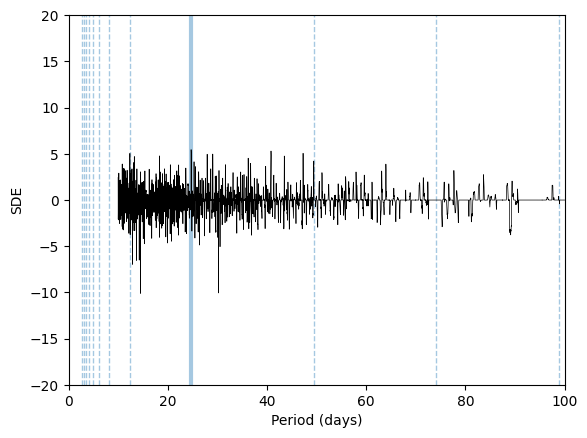

In [13]:
plt.figure()
ax = plt.gca()
ax.axvline(results_2['period'], alpha=0.4, lw=3)
plt.xlim(np.min(results_2['periods']), np.max(results_2['periods']))
for n in range(2, 10):
    ax.axvline(n*results_2['period'], alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(results_2['period'] / n, alpha=0.4, lw=1, linestyle="dashed")
plt.ylabel(r'SDE')
plt.xlabel('Period (days)')
plt.plot(results_2['periods'], results_2['power'], color='black', lw=0.5)
plt.xlim(0, 100)
plt.ylim(-20,20)
# plt.savefig('./plots/toi4438/tls/tls_detrended_noplanetb.png', dpi=300, bbox_inches='tight')